# PROYECTO MACHINE LEARNING - CLUSTERING
### Customers Segmentation

### CHIARA TOTARO

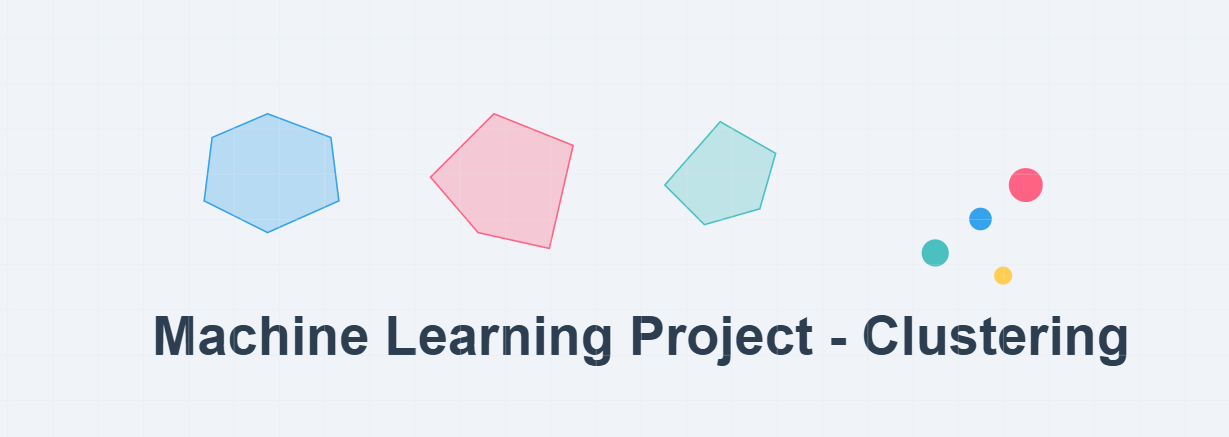

# EDA

El dataset Marketing Campaign contiene información detallada sobre clientes de una empresa, enfocándose en sus datos demográficos, historial de compras y comportamiento frente a campañas de marketing.  

Proporciona informacion sobre :  

🔹 Datos Demográficos: Incluye variables como el año de nacimiento, nivel educativo, estado civil e información sobre el número de niños y adolescentes en el hogar.

🔹 Información Financiera: Registra el ingreso anual del hogar del cliente.

🔹 Comportamiento de Compra: Refleja el gasto en diferentes categorías de productos (vino, carne, pescado, dulces, frutas, oro) en los últimos 2 años. También incluye el número de compras realizadas a través de distintos canales (tiendas, web, catálogo, descuentos).

🔹 Interacción con el Marketing: Mide la respuesta de los clientes a campañas promocionales, indicando cuántas ofertas han aceptado y si han visitado el sitio web recientemente.

#### 📊 Fuente de datos: dataset Marketing-Campaign
El dataset se encuentra disponible opensource en Kaggle

In [1]:
import sys
sys.path.insert(0, '../')
import utils.common as cm  # fichero que contiene las funciones utilizadas
import utils.bootcampviztools as bt # fichero con las funciones de visualizacion


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')



### Cargar el dataset

In [2]:
df = pd.read_csv('../data_sample/marketing_campaign.csv', sep=';')

### Exploración inicial

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

#### Descripción de las variables

``ID``: Identificación única de cada cliente.

``Year_Birth``: Año de nacimiento del cliente.

``Education``: Nivel educativo del cliente.

``Marital_Status``: Estado civil del cliente.

``Kidhome``: Número de niños pequeños en el hogar del cliente.

``Teenhome``: Número de adolescentes en el hogar del cliente.

``Income``: Ingreso anual del hogar del cliente en USD.

``Recency``: Número de días desde la última compra.

``Dt_Customer``: Fecha de inscripción del cliente en la empresa.

``MntFishProducts``: Cantidad gastada en productos de pescado en los últimos 2 años.

``MntMeatProducts``: Cantidad gastada en productos de carne en los últimos 2 años.

``MntFruits``: Cantidad gastada en productos de frutas en los últimos 2 años.

``MntSweetProducts``: Cantidad gastada en productos dulces en los últimos 2 años.

``MntWines``: Cantidad gastada en productos de vino en los últimos 2 años.

``MntGoldProds``: Cantidad gastada en productos de oro en los últimos 2 años.

``NumDealsPurchases``: Número de compras realizadas con descuento.

``NumCatalogPurchases``: Número de compras realizadas mediante catálogo (compra de productos enviados por correo).

``NumStorePurchases``: Número de compras realizadas directamente en tiendas.

``NumWebPurchases``: Número de compras realizadas a través del sitio web de la empresa.

``NumWebVisitsMonth``: Número de visitas al sitio web de la empresa en el último mes.

``AcceptedCmp1``: 1 si el cliente aceptó la oferta en la primera campaña, 0 en caso contrario.

``AcceptedCmp2``: 1 si el cliente aceptó la oferta en la segunda campaña, 0 en caso contrario.

``AcceptedCmp3``: 1 si el cliente aceptó la oferta en la tercera campaña, 0 en caso contrario.

``AcceptedCmp4``: 1 si el cliente aceptó la oferta en la cuarta campaña, 0 en caso contrario.

``AcceptedCmp5``: 1 si el cliente aceptó la oferta en la quinta campaña, 0 en caso contrario.

``Response``: 1 si el cliente aceptó la oferta en la última campaña, 0 en caso contrario.

``Complain``: 1 si el cliente presentó una queja en los últimos 2 años, 0 en caso contrario.

<!-- ID: Unique ID of each customer
Year_Birth: Customer’s year of birth
Education: Customer's level of education
Marital_Status: Customer's marital status
Kidhome: Number of small children in customer's household
Teenhome: Number of teenagers in customer's household
Income: Customer's yearly household income in USD
Recency: Number of days since the last purchase
Dt_Customer: Date of customer's enrollment with the company
MntFishProducts: The amount spent on fish products in the last 2 years
MntMeatProducts: The amount spent on meat products in the last 2 years
MntFruits: The amount spent on fruits products in the last 2 years
MntSweetProducts: Amount spent on sweet products in the last 2 years
MntWines: The amount spent on wine products in the last 2 years
MntGoldProds: The amount spent on gold products in the last 2 years
NumDealsPurchases: Number of purchases made with discount
NumCatalogPurchases: Number of purchases made using a catalog (buying goods to be shipped through the mail)
NumStorePurchases: Number of purchases made directly in stores
NumWebPurchases: Number of purchases made through the company's website
NumWebVisitsMonth: Number of visits to the company's website in the last month
AcceptedCmp1: 1 if customer accepted the offer in the first campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the second campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the third campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the fourth campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the fifth campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
Complain: 1 If the customer complained in the last 2 years, 0 otherwise -->

In [5]:
# Verificar duplicados
sum(df.duplicated())

0

El dataset no presenta datos repetidos

### Comprensión de variables

In [6]:
# funcion que devuelve un Report de las columans 
# #con el % de faltantes, la cardinalidad, el tipo y el tipo sugerido
cm.card_tipo(df) 

Missing%  Card     %_Card     Tipo      tipo_sugerido
ID                       0.0  2240      100.0    int64  Numerica continua
Year_Birth               0.0    59   2.633929    int64  Numerica discreta
Education                0.0     5   0.223214   object         Categorica
Marital_Status           0.0     8   0.357143   object         Categorica
Income                  1.07  1974     88.125  float64  Numerica continua
Kidhome                  0.0     3   0.133929    int64         Categorica
Teenhome                 0.0     3   0.133929    int64         Categorica
Dt_Customer              0.0   663  29.598214   object  Numerica discreta
Recency                  0.0   100   4.464286    int64  Numerica discreta
MntWines                 0.0   776  34.642857    int64  Numerica continua
MntFruits                0.0   158   7.053571    int64  Numerica discreta
MntMeatProducts          0.0   558  24.910714    int64  Numerica discreta
MntFishProducts          0.0   182      8.125    int64  Numerica discreta
MntSweetProducts         0.0   177   7.901786    int64  Numerica discreta
MntGoldProds             0.0   213   9.508929    int64  Numerica discreta
NumDealsPurchases        0.0    15   0.669643    int64         Categorica
NumWebPurchases          0.0    15   0.669643    int64         Categorica
NumCatalogPurchases      0.0    14      0.625    int64         Categorica
NumStorePurchases        0.0    14      0.625    int64         Categorica
NumWebVisitsMonth        0.0    16   0.714286    int64         Categorica
AcceptedCmp3             0.0     2   0.089286    int64            Binaria
AcceptedCmp4             0.0     2   0.089286    int64            Binaria
AcceptedCmp5             0.0     2   0.089286    int64            Binaria
AcceptedCmp1             0.0     2   0.089286    int64            Binaria
AcceptedCmp2             0.0     2   0.089286    int64            Binaria
Complain                 0.0     2   0.089286    int64            Binaria
Z_CostContact            0.0     1        0.0    int64         Categorica
Z_Revenue                0.0     1        0.0    int64         Categorica
Response                 0.0     2   0.089286    int64            Binaria

#### Forzar el data type

In [7]:
new_types = {
    np.int64: ['Year_Birth','Kidhome','Teenhome','Recency','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds', 
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
    float: ['Income'],
    str: ['Education', 'Marital_Status'],
    bool: ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response']
}

for key, value in new_types.items():
    for i in value:
        df[i] = df[i].astype(key, errors='ignore')

In [9]:
cm.card_tipo(df)

Missing%  Card     %_Card     Tipo      tipo_sugerido
ID                       0.0  2240      100.0    int64  Numerica continua
Year_Birth               0.0    59   2.633929    int64  Numerica discreta
Education                0.0     5   0.223214   object         Categorica
Marital_Status           0.0     8   0.357143   object         Categorica
Income                  1.07  1974     88.125  float64  Numerica continua
Kidhome                  0.0     3   0.133929    int64         Categorica
Teenhome                 0.0     3   0.133929    int64         Categorica
Dt_Customer              0.0   663  29.598214   object  Numerica discreta
Recency                  0.0   100   4.464286    int64  Numerica discreta
MntWines                 0.0   776  34.642857    int64  Numerica continua
MntFruits                0.0   158   7.053571    int64  Numerica discreta
MntMeatProducts          0.0   558  24.910714    int64  Numerica discreta
MntFishProducts          0.0   182      8.125    int64  Numerica discreta
MntSweetProducts         0.0   177   7.901786    int64  Numerica discreta
MntGoldProds             0.0   213   9.508929    int64  Numerica discreta
NumDealsPurchases        0.0    15   0.669643    int64         Categorica
NumWebPurchases          0.0    15   0.669643    int64         Categorica
NumCatalogPurchases      0.0    14      0.625    int64         Categorica
NumStorePurchases        0.0    14      0.625    int64         Categorica
NumWebVisitsMonth        0.0    16   0.714286    int64         Categorica
AcceptedCmp3             0.0     2   0.089286     bool            Binaria
AcceptedCmp4             0.0     2   0.089286     bool            Binaria
AcceptedCmp5             0.0     2   0.089286     bool            Binaria
AcceptedCmp1             0.0     2   0.089286     bool            Binaria
AcceptedCmp2             0.0     2   0.089286     bool            Binaria
Complain                 0.0     2   0.089286     bool            Binaria
Z_CostContact            0.0     1        0.0    int64         Categorica
Z_Revenue                0.0     1        0.0    int64         Categorica
Response                 0.0     2   0.089286     bool            Binaria

💡 Análisis:  
Observando la tabla que nos devuelve la funcion Card_tipo podemos ver que la variable Income presenta nulos.
Ademas nos proporciona informacion sobre columnas irrelevantes para nuestros analysis puesto que no aportan informacion por tener cardinalidad proxima a 0 o igual a 100%
- ID
- Z_CostContact
- Z_Revenue


In [10]:
# Eliminar columnas con cardinalidad 100% o 0, que no aportan informacion 
df.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

### Preprocesamiento de datos

In [11]:
# Conversion Dt_Customer a datetime
# Calculo antigüedad del cliente en meses

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%Y-%m-%d')
df['CustomerSinceInMonth'] = ((datetime.now() - df['Dt_Customer']).dt.days / 30).round(0)

In [12]:
#Fecha min y max de incorporacion de clientes
print(df['Dt_Customer'].iloc[df['Dt_Customer'].argmin()])
print(df['Dt_Customer'].iloc[df['Dt_Customer'].argmax()])

2012-07-30 00:00:00
2014-06-29 00:00:00


In [31]:
# # PIPELINE 
# # 
# # Crear preprocessor
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numeric_cols),  # Normalización de numéricas
#         ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # Codificación de categóricas
#     ])
    
# # Preprocesar datos
# X_preprocessed = preprocessor.fit_transform(df)
    

💡 Análisis:  
Detection valores anomalos :
- Years_Birth contiene un dato 1893 que parece ser un error. Lo elimino. 
- Creo columna Age. Elimino todo lo que es superiro a 100 por ser outliers/errores
- Income presenta un valor max de 666666, 12 veces superior a la media. Lo considero outlier y lo elimino

In [13]:
# Crear características derivadas
# Calculo edad a partir del ultimo año+1 de incorporacion de clientes - de toma de datos -
#el ultimo año fue el 2014, considero el 2015
df['Age'] = 2015 - df['Year_Birth']

### Análisis univariante ``Variables Numericas``

In [14]:
# Identificar tipos de columnas numericas
features_num = df.select_dtypes(include=['int64', 'float64']).columns


(18, 2)


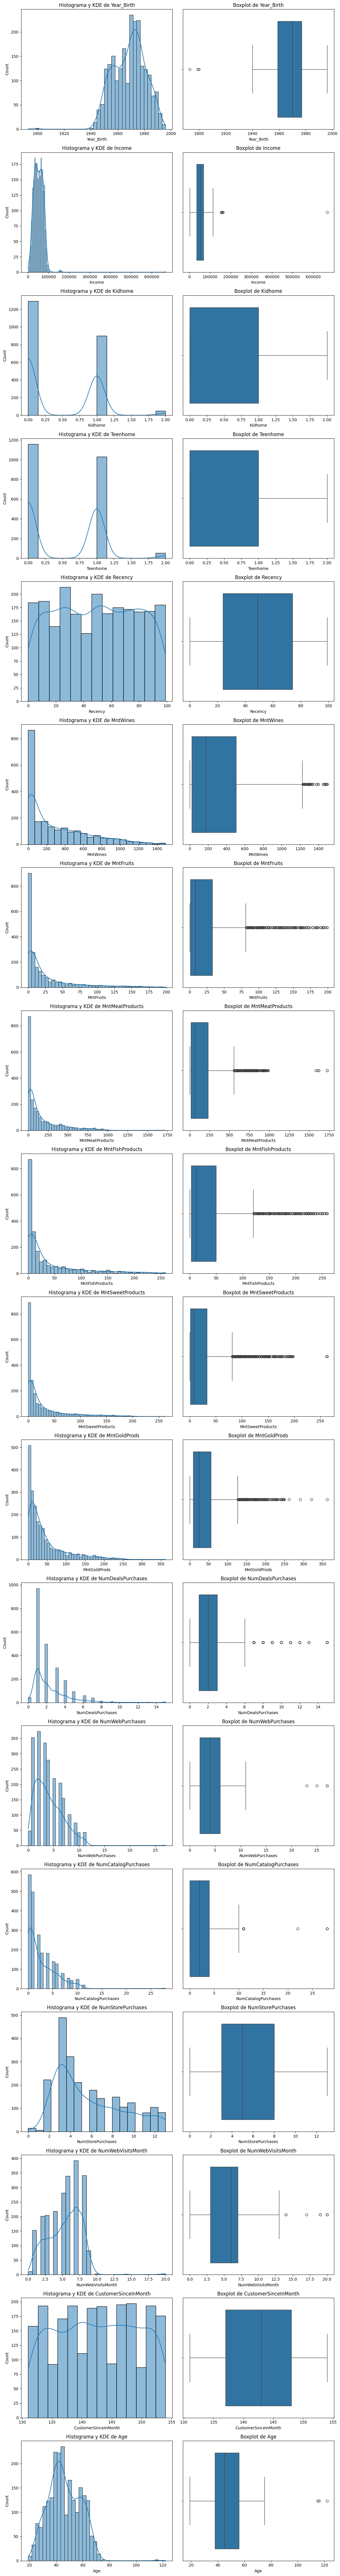

In [15]:
bt.plot_combined_graphs(df, columns = features_num)

 - Income contiene outliers : los elimino, de esta manera se aproxima mas a una normal
 - Age : elimino datos outliers(edad>100 años)

In [16]:
#Elimino valores de Income superiores a 15000
df = df[df['Income'] < 150000 ].copy()

In [ ]:
#Elimino valores de Age superiores a 100
df = df[df['Age'] < 100 ].copy()

In [18]:
#Fecha min y max de fecha de nacimiento de clientes
print(df['Year_Birth'].iloc[df['Year_Birth'].argmin()])
print(df['Year_Birth'].iloc[df['Year_Birth'].argmax()])

1940
1996


Eliminando los valores anomalos en Age y Income ya no tenemos nulos tampoco en Income

In [19]:
# Rellenar valores nulos de Income con la mediana si vuelven a aparecer
df['Income'].fillna(df['Income'].median(), inplace=True)

(2, 2)


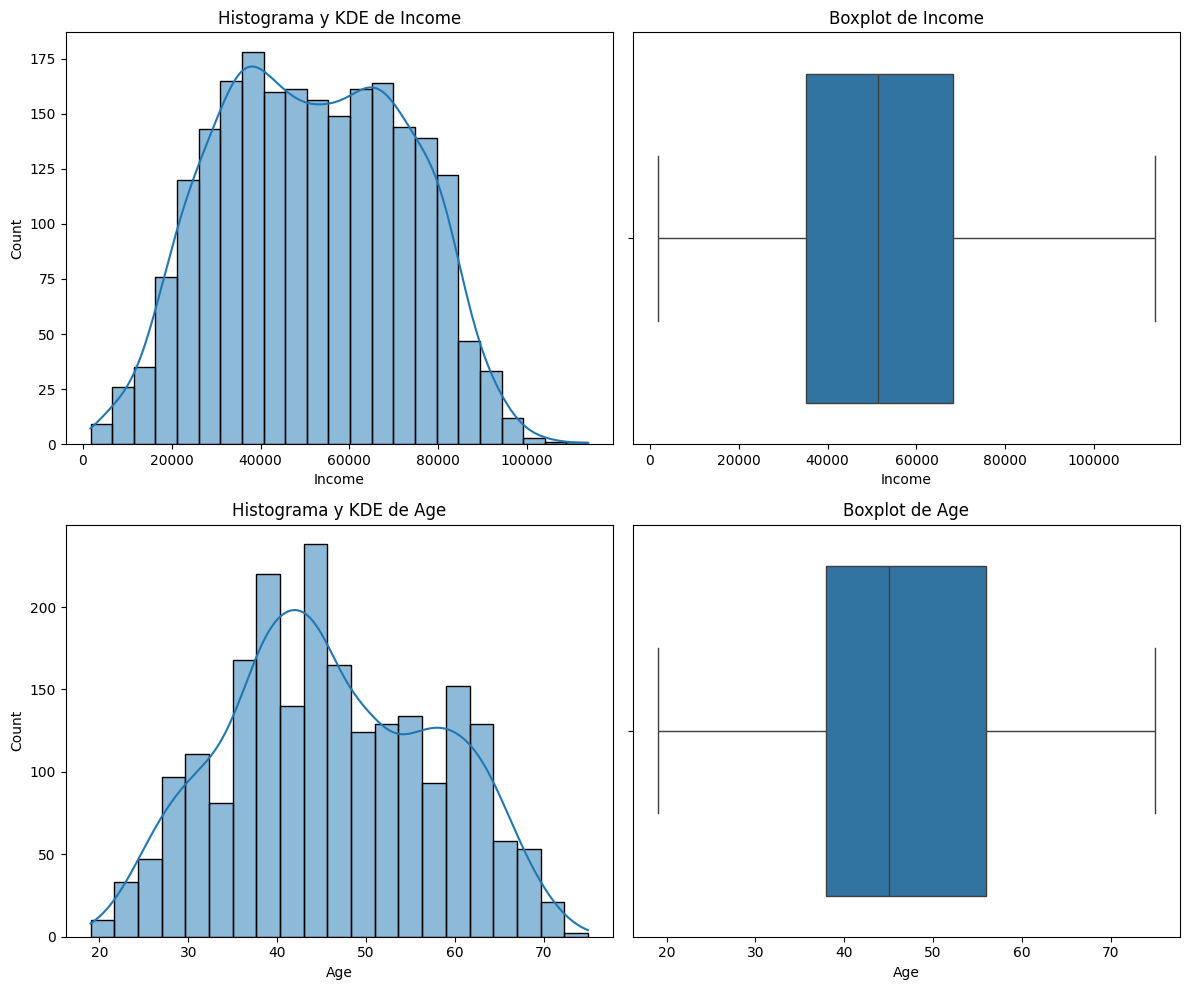

In [20]:
bt.plot_combined_graphs(df, columns = ['Income', 'Age' ])

In [21]:
# Agrupacion de las edades 
cut_labels_Age = ['<35', '35-50', '50-65', '+65']
cut_bins = [0, 35, 50, 65, 120]
df['Age_group'] = pd.cut(df['Age'], bins=cut_bins, labels=cut_labels_Age)

In [22]:
df['Age_group'].value_counts()

Age_group
35-50    1016
50-65     666
<35       418
+65       105
Name: count, dtype: int64

In [23]:
#Divido Income en 4 categorias ponderadas
cut_labels_Income = ['Low income', 'Low to medium income', 'Medium to high income', 'High income']
df['Income_group'] = pd.qcut(df['Income'], q=4, labels=cut_labels_Income)

In [24]:
df['Income_group'].value_counts()

Income_group
Low income               553
Medium to high income    551
High income              551
Low to medium income     550
Name: count, dtype: int64

### Análisis univariante ``Variables Categoricas``

In [25]:
# Identificar tipos de columnas Categoricas

features_cat = df.select_dtypes(include=['object', 'category']).columns
features_cat_bool = df.select_dtypes(include=['bool']).columns

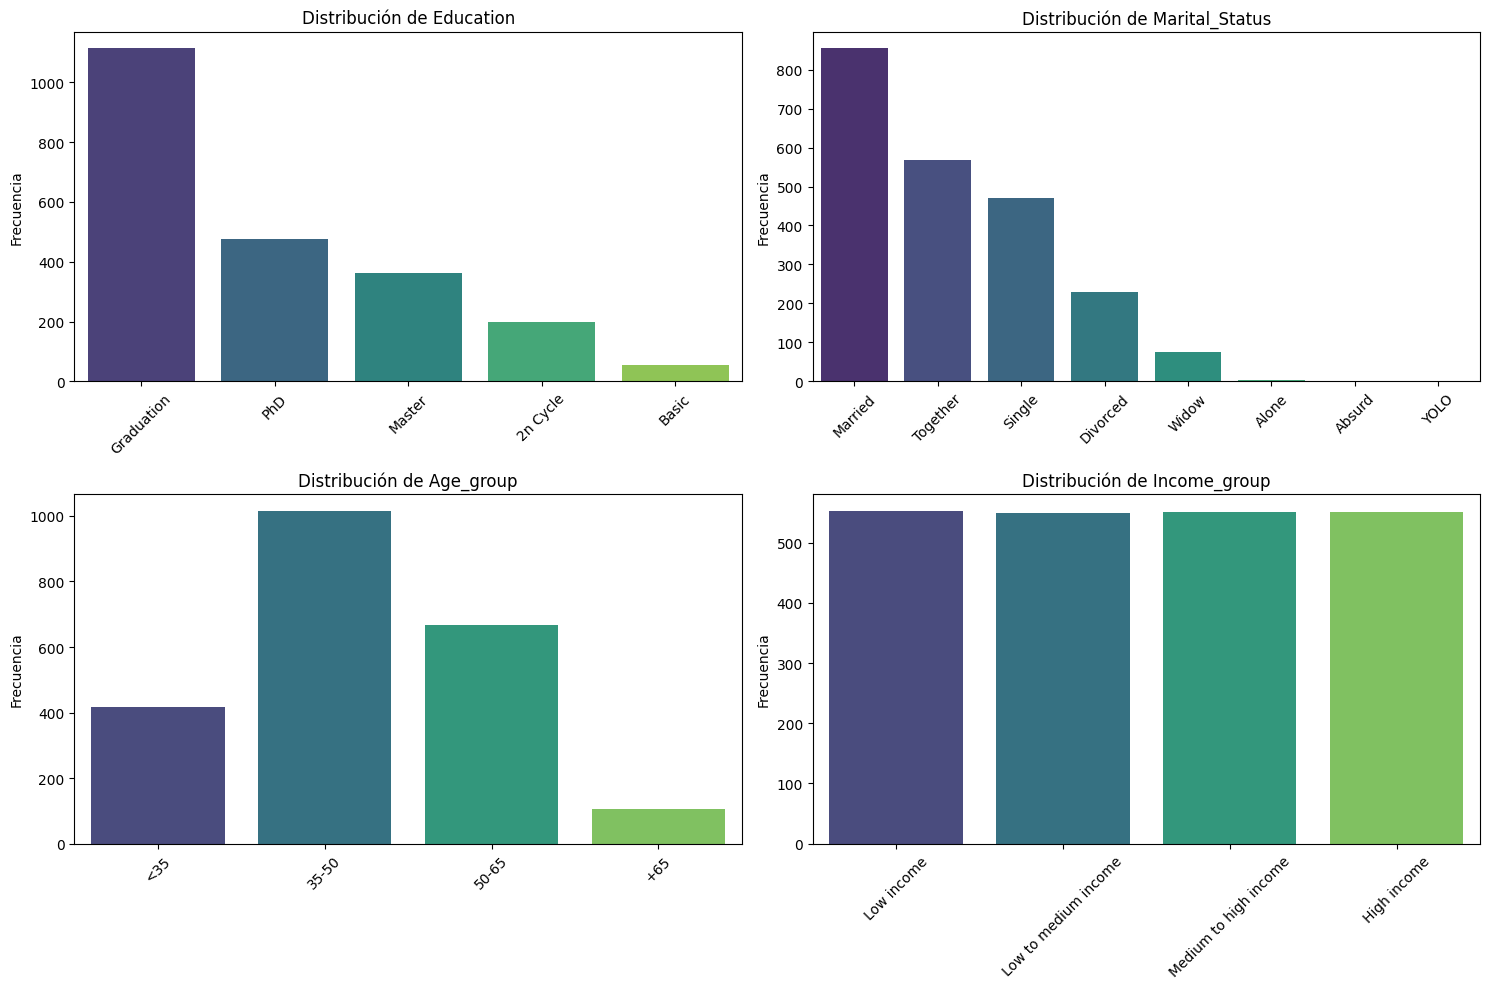

In [26]:
bt.pinta_distribucion_categoricas(df, features_cat)

In [27]:
# Creacion nueva variable
# Total de niños en casa
df['TotalSons'] = df['Kidhome'] + df['Teenhome']

In [28]:
df['TotalSons']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: TotalSons, Length: 2205, dtype: int64

In [ ]:
# Aplico la función Family_Status para clasificar según TotalSons y Marital_Status para crear una nueva variable
df['Family_Status'] = df.apply(cm.family_status, axis=1)


Considerando los niveles de educación ordenados de más alto a más bajo según jerarquía académica, creo 3 niveles : 'High' - 'Medium' - 'Basic'

🏆 PhD (Doctorado)  - High  
🎓 Master (Maestría) - High  
2n Cycle (Segundo ciclo, equivale a estudios avanzados de licenciatura o especialización) - High  
Graduation (Licenciatura o grado universitario) - Medium  
Basic (Educación básica, primaria o secundaria)  - Basic  



In [31]:
# Funcion que agrupa Education
df['Education_Level'] = df['Education'].apply(cm.education_level)

In [32]:
df['Education_Level'].value_counts()

Education_Level
Medium    1113
High      1038
Basic       54
Name: count, dtype: int64

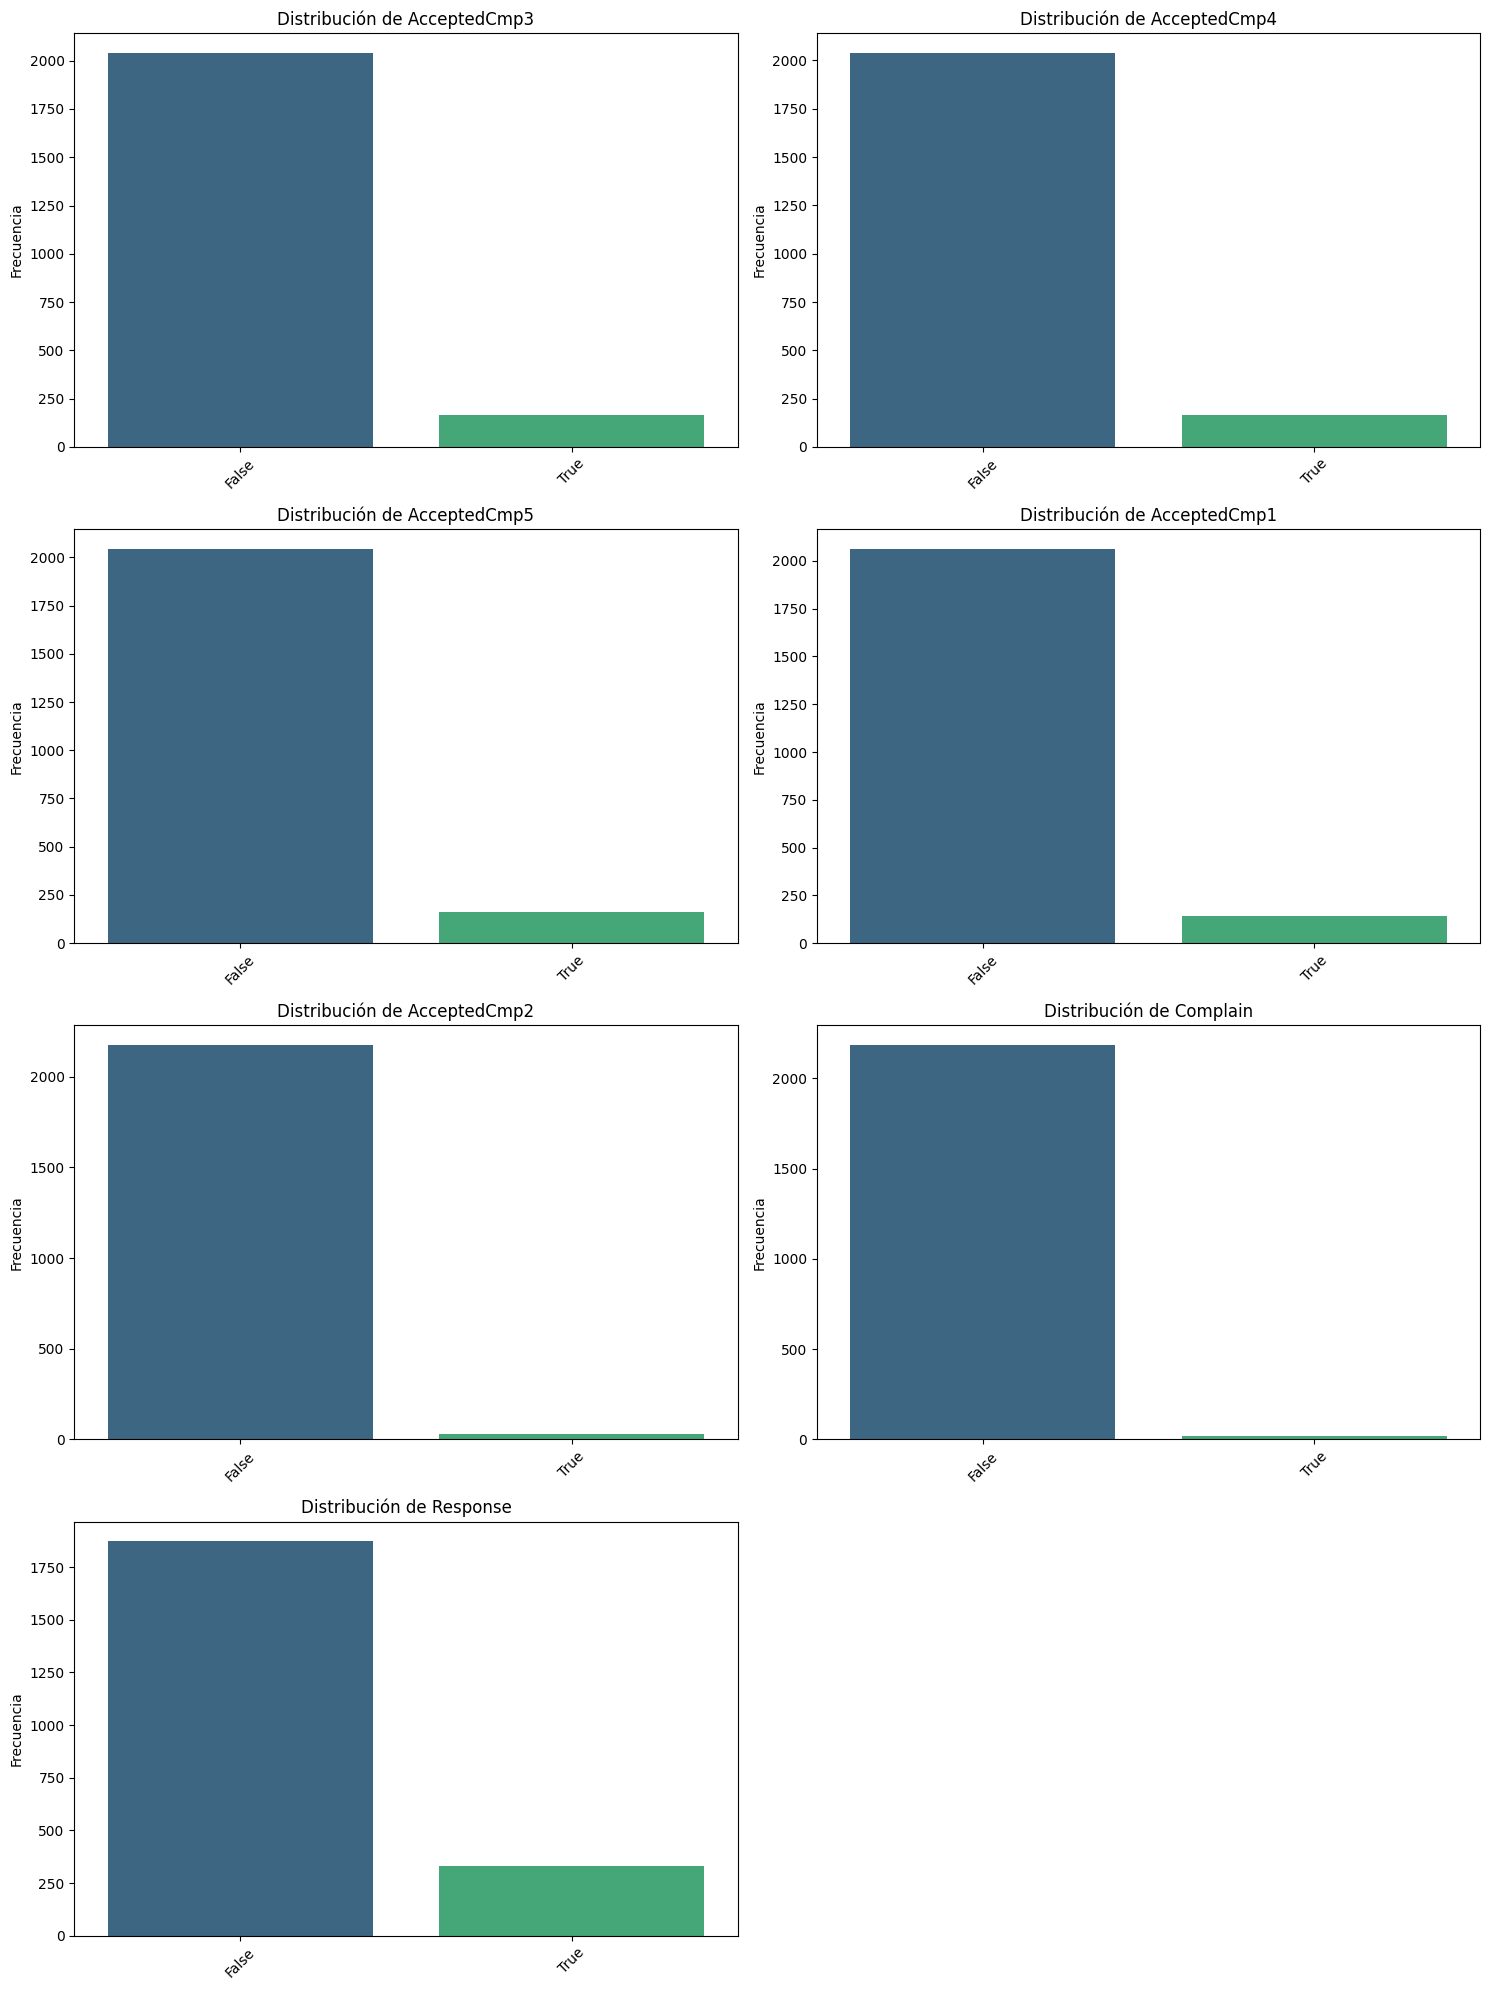

In [33]:
bt.pinta_distribucion_categoricas(df, features_cat_bool)

💡 Análisis:  
Mirando los gráficos de distribución para AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, y Response, podemos ver que: 

Distribución de Campañas de Marketing (AcceptedCmp1-5 y Response):

En todas las campañas de marketing hay un predominio de "False", es decir hay una muy baja tasas de aceptación de campañas de marketing y una pequeña proporción de aceptacion, lo que sugiere que habria que revisar las estrategias de marketing para mejorar la participación


Distribución de Quejas (Complain): Muy pocas quejas en el conjunto de datos - features no relevante

#### Análisis Bivariante

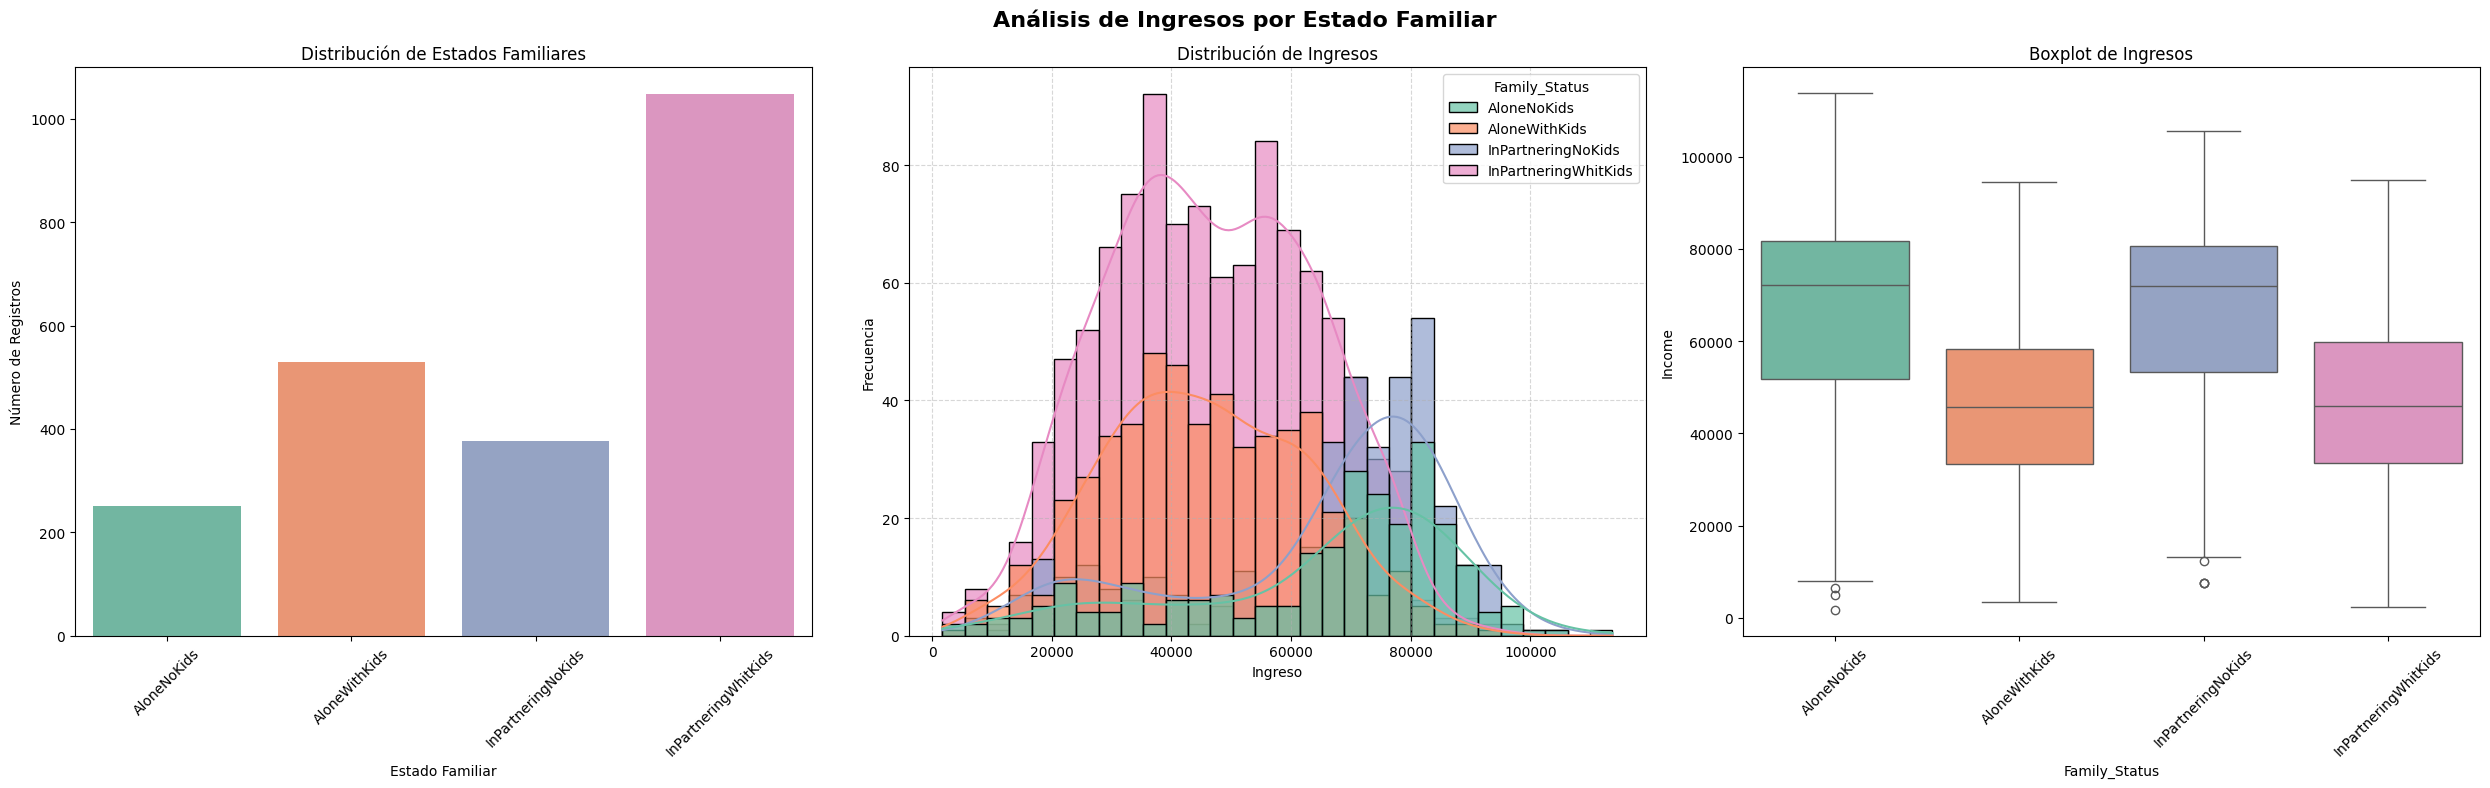

In [34]:
# Grafico de Income por Family_status

fig, axes = plt.subplots(1, 3, figsize=(25, 8))

# Título principal
fig.suptitle('Análisis de Ingresos por Estado Familiar', fontsize=16, fontweight='bold')

# Distribución de Family_Status
sns.countplot(data=df, x='Family_Status', ax=axes[0], palette='Set2')
axes[0].set_title('Distribución de Estados Familiares')
axes[0].set_xlabel('Estado Familiar')
axes[0].set_ylabel('Número de Registros')
axes[0].tick_params(axis='x', rotation=45)

# Histograma
sns.histplot(data=df, x="Income", hue="Family_Status", bins=30, kde=True, palette="Set2", alpha=0.7, ax=axes[1])
axes[1].set_xlabel("Ingreso")
axes[1].set_ylabel("Frecuencia")
axes[1].grid(True, linestyle="--", alpha=0.5)
axes[1].set_title('Distribución de Ingresos')

# Boxplot
sns.boxplot(data=df, x="Family_Status", y='Income', ax=axes[2], palette="Set2")
axes[2].set_title('Boxplot de Ingresos')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

💡 Analysis:  _Hay un impacto economico de tener hijos_  

Personas sin hijos (AloneNoKids, InPartneringNoKids) tienden a tener ingresos más altos  
Familias con hijos muestran ingresos más bajos

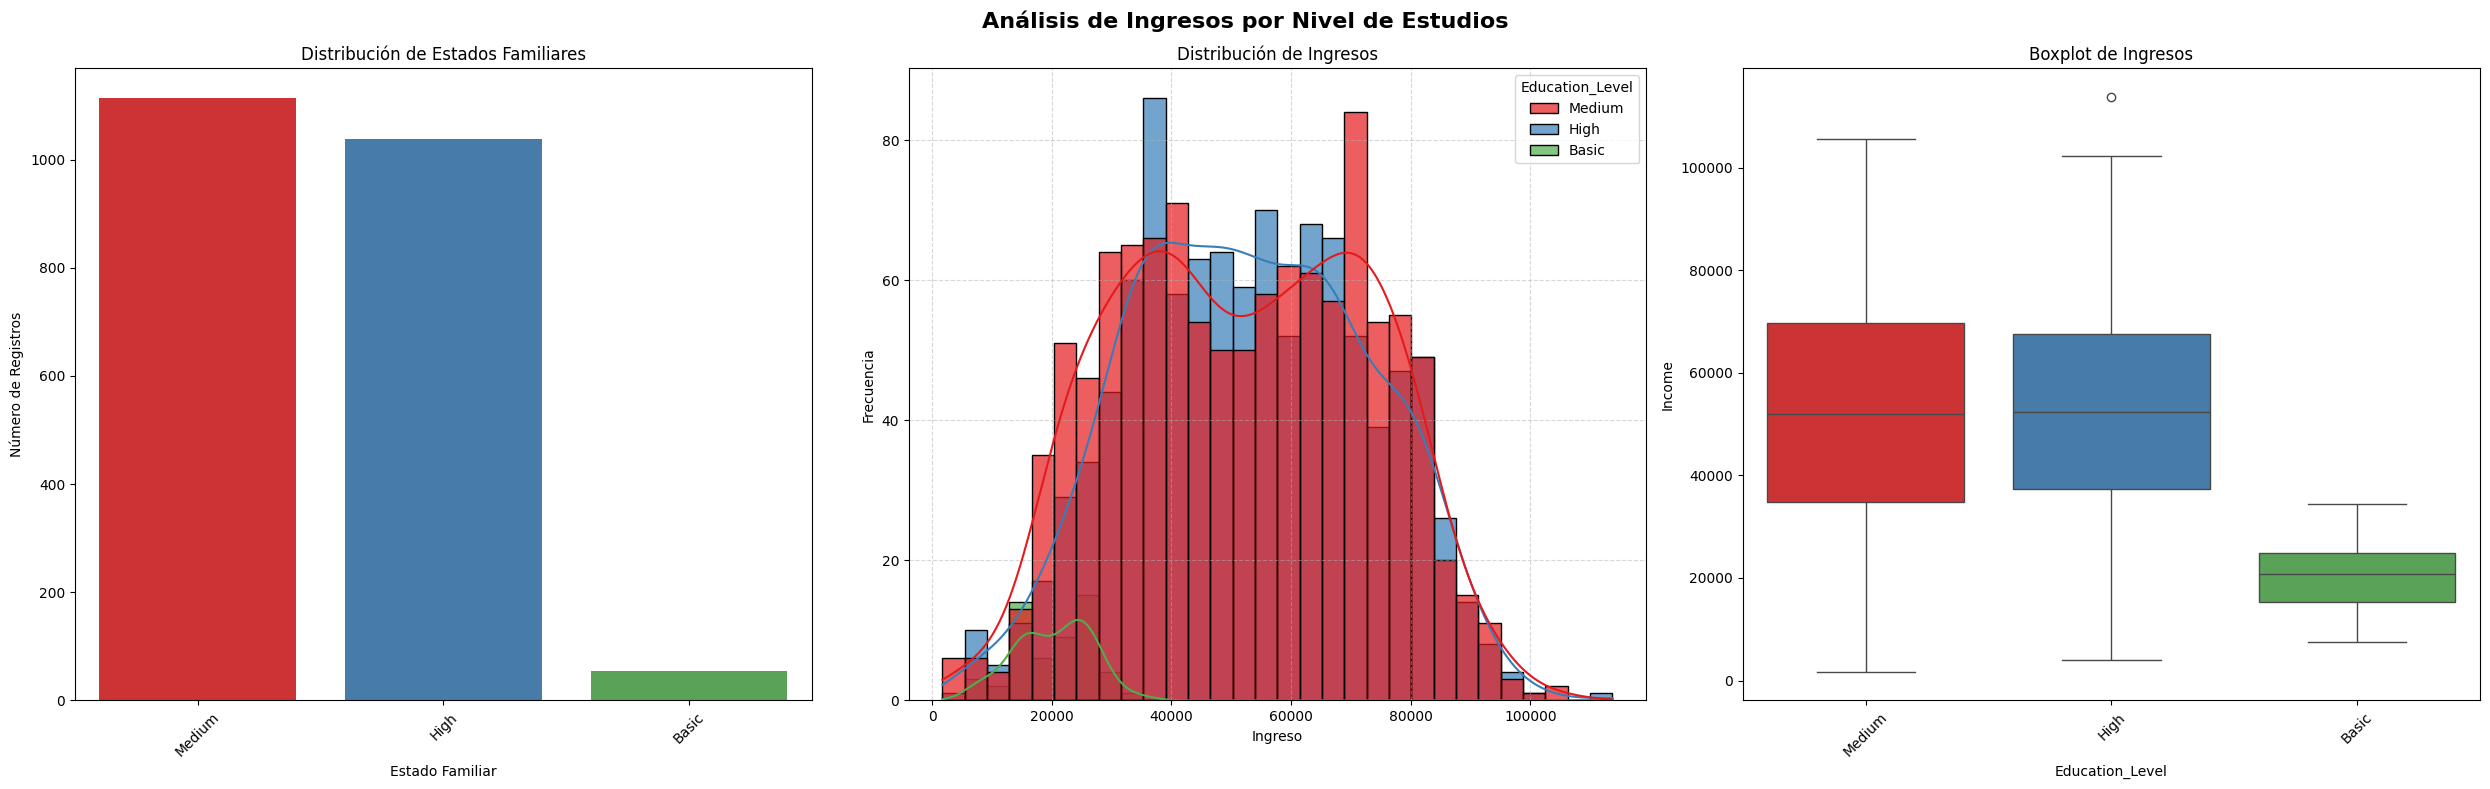

In [46]:
# Grafico de Income por Nivel de Estudio

fig, axes = plt.subplots(1, 3, figsize=(25, 8))

# Título principal
fig.suptitle('Análisis de Ingresos por Nivel de Estudios', fontsize=16, fontweight='bold')

# Distribución de Education_Level
sns.countplot(data=df, x='Education_Level', ax=axes[0], palette='Set1')
axes[0].set_title('Distribución de Estados Familiares')
axes[0].set_xlabel('Estado Familiar')
axes[0].set_ylabel('Número de Registros')
axes[0].tick_params(axis='x', rotation=45)

# Histograma
sns.histplot(data=df, x="Income", hue="Education_Level", bins=30, kde=True, palette="Set1", alpha=0.7, ax=axes[1])
axes[1].set_xlabel("Ingreso")
axes[1].set_ylabel("Frecuencia")
axes[1].grid(True, linestyle="--", alpha=0.5)
axes[1].set_title('Distribución de Ingresos')

# Boxplot
sns.boxplot(data=df, x="Education_Level", y='Income', ax=axes[2], palette="Set1")
axes[2].set_title('Boxplot de Ingresos')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

💡 Analysis:  _Nivel educativo parece influir en los ingresos_  

Predominio de dos categorías: Medium y High, muy pocos registros en Basic  
Medium y High tienen distribuciones de ingresos similares  
Basic muestra rangos de ingresos significativamente más bajo


In [36]:
#Creacion Features Total gastado sumando todos los gastos en los distintos productos
df['Total_Spend']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

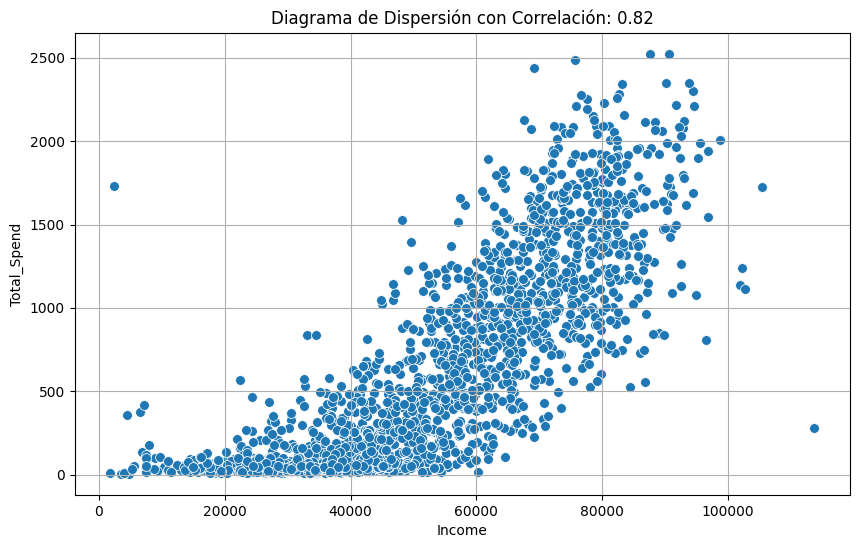

In [37]:
bt.grafico_dispersion_con_correlacion(df, 'Income', 'Total_Spend', tamano_puntos=50, mostrar_correlacion=True)

💡 Analysis : _Fuerte relación entre ingresos y gasto total_  

correlacion linear y positiva: a màs ingresos màs gastos

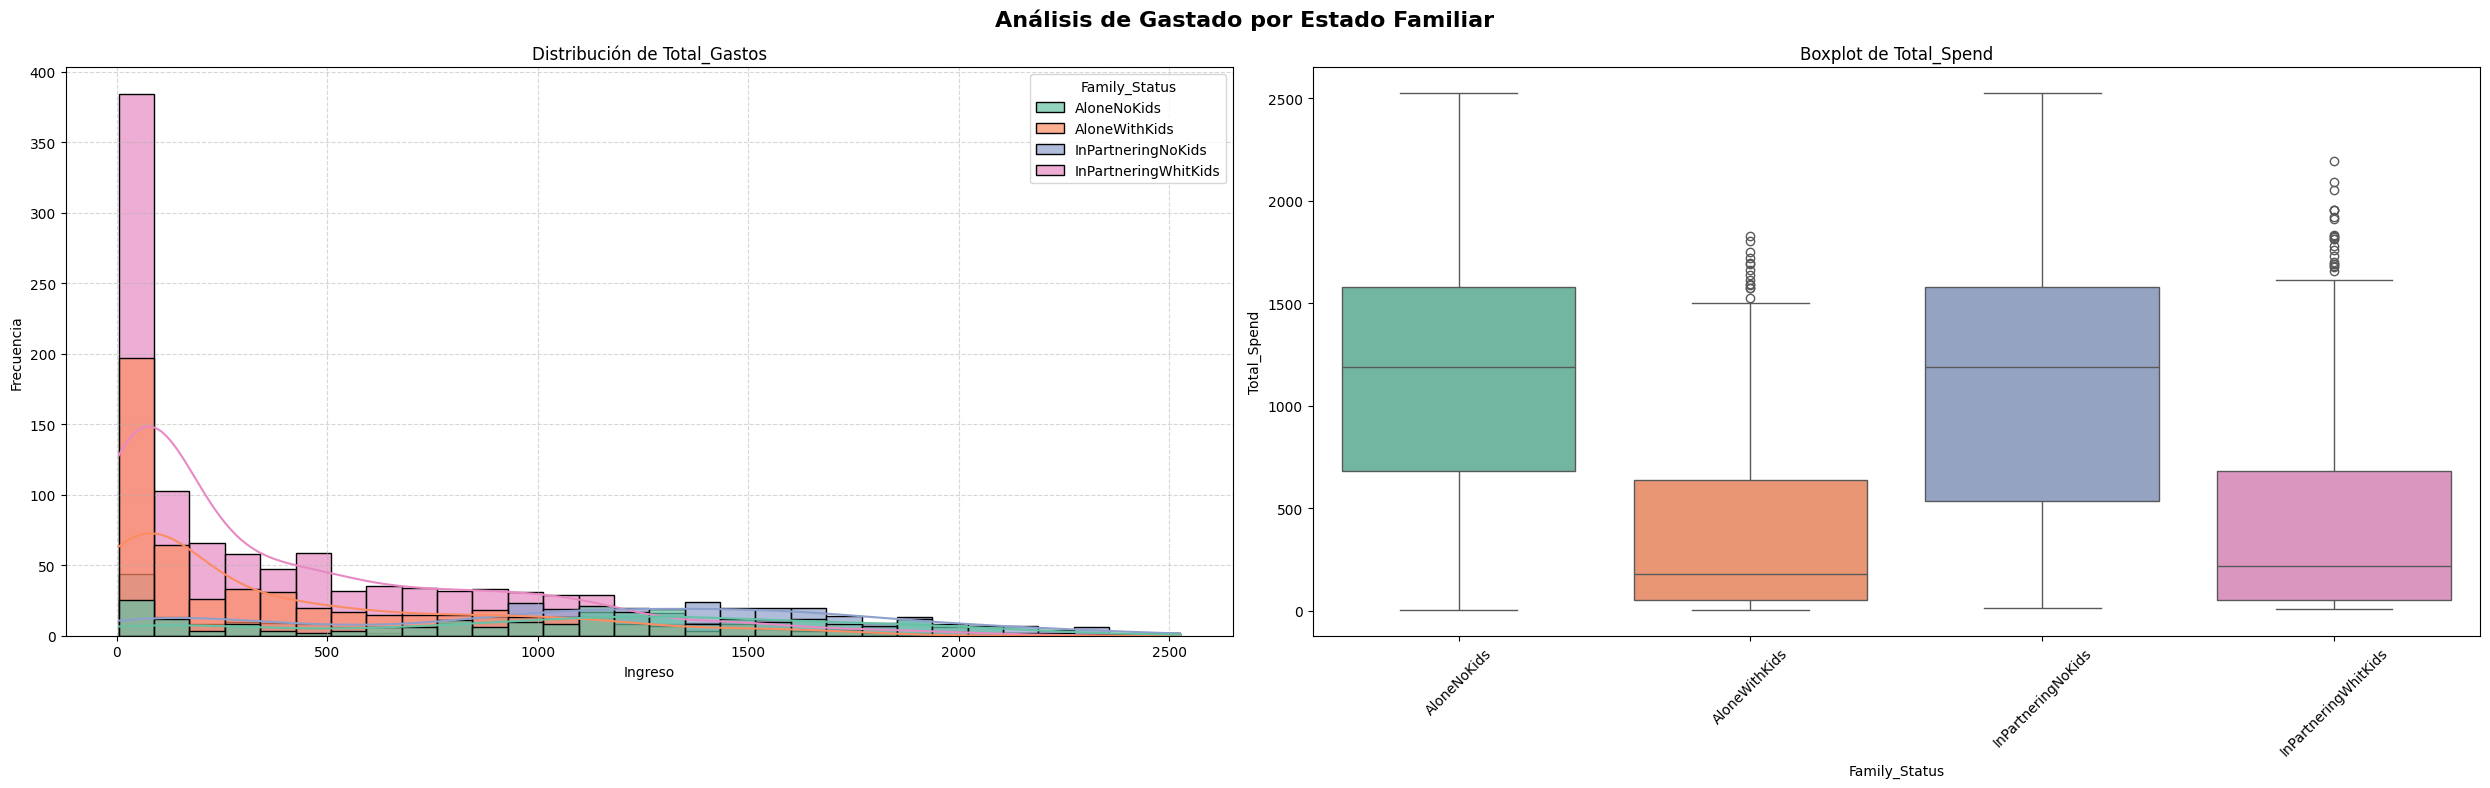

In [38]:
# Grafico de Total_Spend por Family_status

fig, axes = plt.subplots(1, 2, figsize=(25, 8))

# Título principal
fig.suptitle('Análisis de Gastado por Estado Familiar', fontsize=16, fontweight='bold')

# Histograma
sns.histplot(data=df, x="Total_Spend", hue="Family_Status", bins=30, kde=True, palette="Set2", alpha=0.7, ax=axes[0])
axes[0].set_xlabel("Ingreso")
axes[0].set_ylabel("Frecuencia")
axes[0].grid(True, linestyle="--", alpha=0.5)
axes[0].set_title('Distribución de Total_Gastos')

# Boxplot
sns.boxplot(data=df, x="Family_Status", y='Total_Spend', ax=axes[1], palette="Set2")
axes[1].set_title('Boxplot de Total_Spend')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

💡 Análisis: _Hay un impacto economico de tener hijos_

Estado familiar influye en la distribución del Total Gastado
Personas sin hijos tienden a gastar más  
Familias con hijos, especialmente AloneWithKids, muestran niveles de gastos más bajos


In [39]:
#Creacion Features que suma los resultados de todas las campañas realizadas
df['Total_Campañas_Aceptadas']=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']

In [40]:
#Creacion Features suma de todas las compras realizadas en los distintos canales
df['Total_Compras']=df['NumDealsPurchases']+df['NumWebPurchases']+df['NumStorePurchases']+df['NumCatalogPurchases']

In [41]:
#Create the new feature AmountPerPurchase 
df['MediaXcompra'] = df['Total_Spend'] / (df['Total_Compras']+1)

In [42]:
df.describe()

Year_Birth         Income      Kidhome     Teenhome  \
count  2205.000000    2205.000000  2205.000000  2205.000000   
mean   1968.904308   51622.094785     0.442177     0.506576   
min    1940.000000    1730.000000     0.000000     0.000000   
25%    1959.000000   35196.000000     0.000000     0.000000   
50%    1970.000000   51287.000000     0.000000     0.000000   
75%    1977.000000   68281.000000     1.000000     1.000000   
max    1996.000000  113734.000000     2.000000     2.000000   
std      11.705801   20713.063826     0.537132     0.544380   

                         Dt_Customer      Recency     MntWines    MntFruits  \
count                           2205  2205.000000  2205.000000  2205.000000   
mean   2013-07-10 06:45:33.061224704    49.009070   306.164626    26.403175   
min              2012-07-30 00:00:00     0.000000     0.000000     0.000000   
25%              2013-01-16 00:00:00    24.000000    24.000000     2.000000   
50%              2013-07-08 00:00:00    49.000000   178.000000     8.000000   
75%              2013-12-31 00:00:00    74.000000   507.000000    33.000000   
max              2014-06-29 00:00:00    99.000000  1493.000000   199.000000   
std                              NaN    28.932111   337.493839    39.784484   

       MntMeatProducts  MntFishProducts  ...  NumWebPurchases  \
count      2205.000000      2205.000000  ...      2205.000000   
mean        165.312018        37.756463  ...         4.100680   
min           0.000000         0.000000  ...         0.000000   
25%          16.000000         3.000000  ...         2.000000   
50%          68.000000        12.000000  ...         4.000000   
75%         232.000000        50.000000  ...         6.000000   
max        1725.000000       259.000000  ...        27.000000   
std         217.784507        54.824635  ...         2.737424   

       NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
count          2205.000000        2205.000000        2205.000000   
mean              2.645351           5.823583           5.336961   
min               0.000000           0.000000           0.000000   
25%               0.000000           3.000000           3.000000   
50%               2.000000           5.000000           6.000000   
75%               4.000000           8.000000           7.000000   
max              28.000000          13.000000          20.000000   
std               2.798647           3.241796           2.413535   

       CustomerSinceInMonth          Age    TotalSons  Total_Spend  \
count           2205.000000  2205.000000  2205.000000  2205.000000   
mean             142.628571    46.095692     0.948753   606.821769   
min              131.000000    19.000000     0.000000     5.000000   
25%              137.000000    38.000000     0.000000    69.000000   
50%              143.000000    45.000000     1.000000   397.000000   
75%              148.000000    56.000000     1.000000  1047.000000   
max              154.000000    75.000000     3.000000  2525.000000   
std                6.771913    11.705801     0.749231   601.675284   

       Total_Compras  MediaXcompra  
count    2205.000000   2205.000000  
mean       14.887982     30.638148  
min         0.000000      0.500000  
25%         8.000000      8.500000  
50%        15.000000     21.923077  
75%        21.000000     43.666667  
max        43.000000    160.857143  
std         7.615277     27.104772  

[8 rows x 23 columns]

In [62]:
features_num = df.select_dtypes(include=['int64', 'float64']).columns
features_num

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'CustomerSinceInMonth', 'Age', 'TotalSons', 'Total_Spend',
       'Total_Compras', 'MediaXcompra'],
      dtype='object')

In [43]:
features_num_pairplot = ['Income', 'Total_Spend','Total_Compras', 'MediaXcompra','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
      'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
     'CustomerSinceInMonth', 'Age', 'TotalSons', 'Recency']

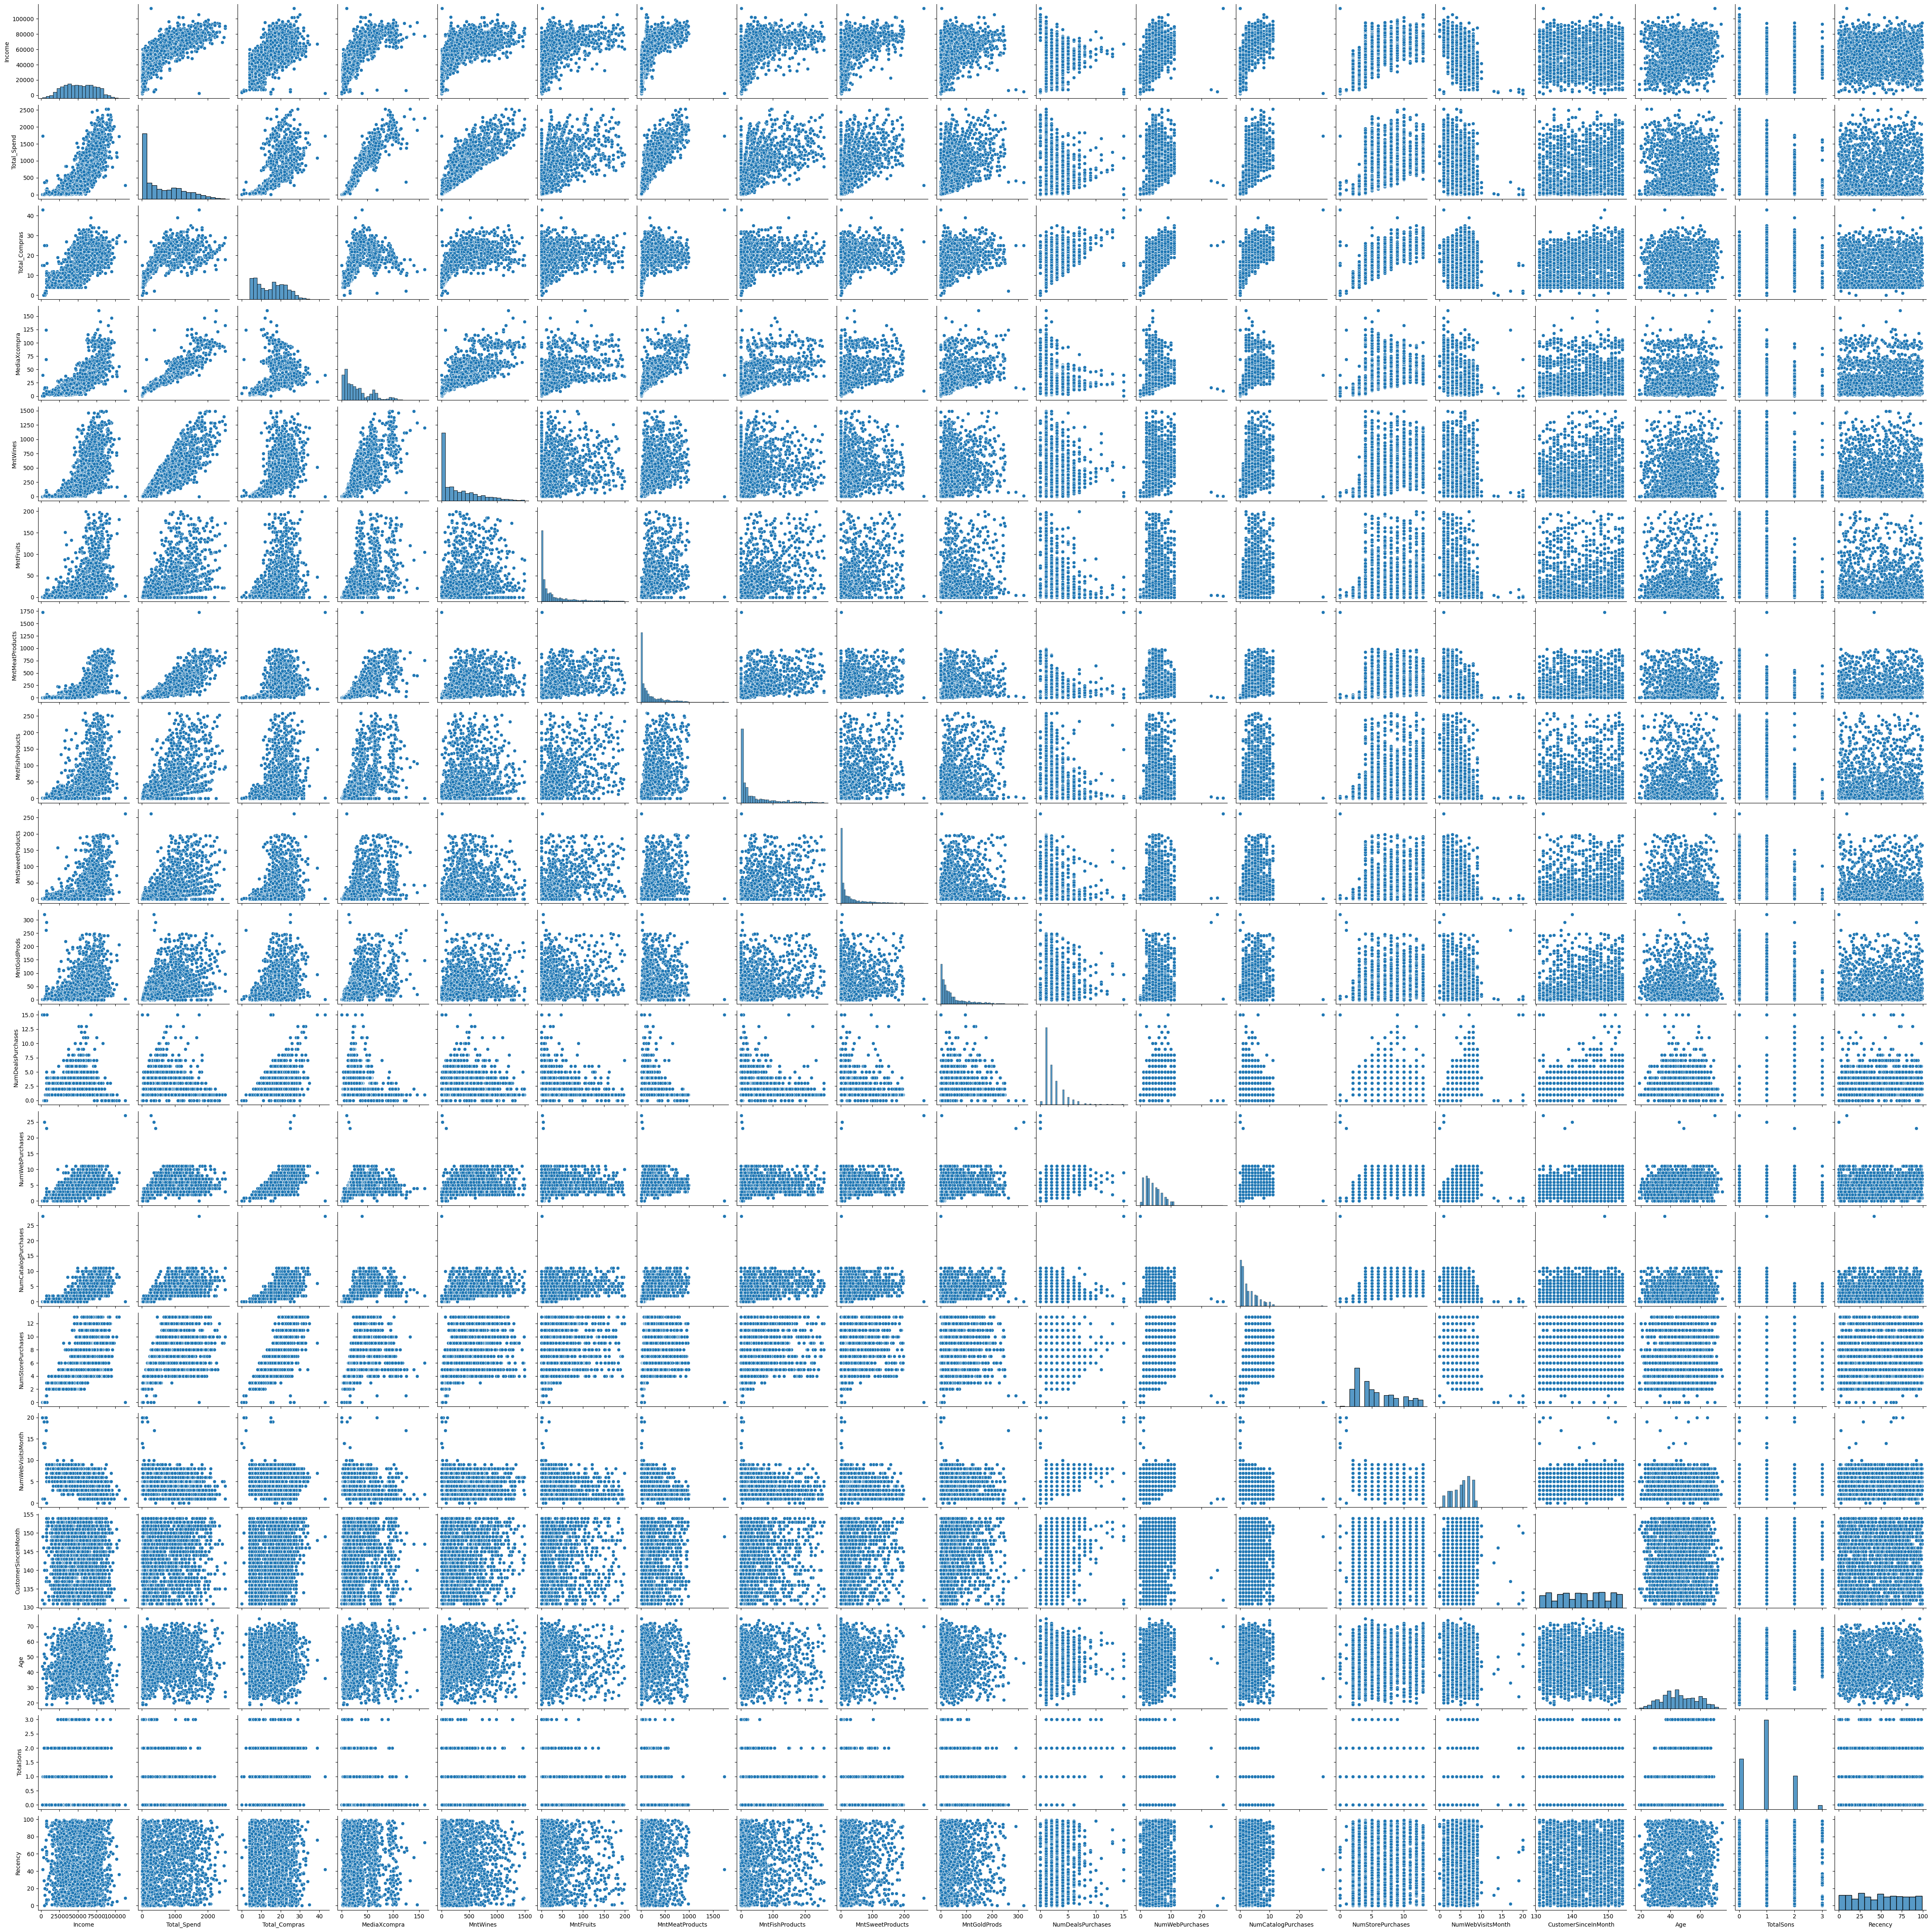

In [44]:
sns.pairplot(df[features_num_pairplot])

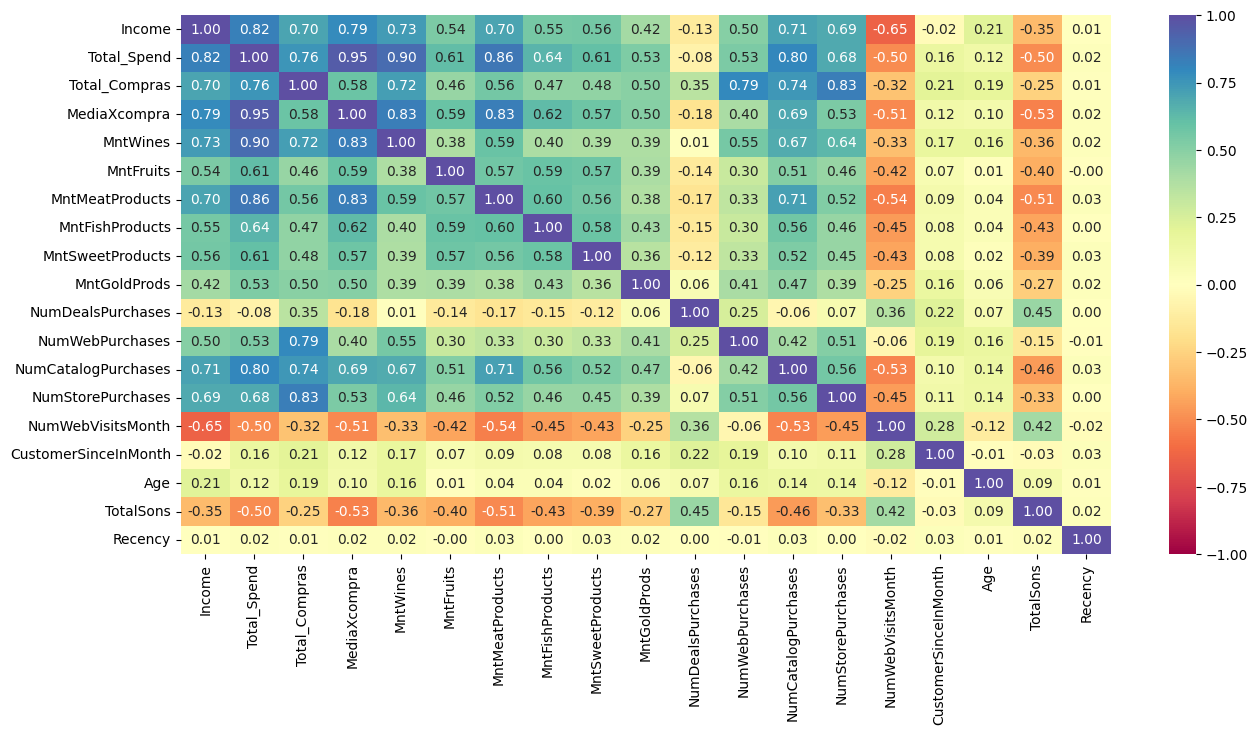

In [47]:
# Plot the correlation plot for new data
plt.figure(figsize=(15, 7))                                                        # Setting the plot size
sns.heatmap(df[features_num_pairplot].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f",  cmap="Spectral")  # Plotting the correlation plot
plt.show()

💡 Análisis Correlaciones: 

- Variables de Gasto:
Gastos en diferentes categorías (Wines, Fruits, MeatProducts) tienen correlaciones moderadas entre sí  
Income correlaciona positivamente con todos los tipos de gasto


- Comportamiento de Compra:  
Compras por catálogo y tienda tienen alta correlación
Compras web tienen menor correlación con otros tipos de compras
Recency no tiene correlacion con las otras variables, no parece ser relevante.

- Aspectos Demográficos:  
Age tiene correlaciones débiles con la mayoría de variables
Número de hijos (Total_Sons) muestra correlaciones negativas con gastos

Conclusiones Principales:

El ingreso es el principal predictor de gasto total
Diferentes canales de compra muestran patrones de comportamiento distintos
Tener hijos parece reducir el gasto en diferentes categorías
